# Code for visualiation of daily and monthly load profiles

This file contains two functions used for visualization of the load profiles.  

load_profile_plot() plots the average daily and monthly load profiles, as well as the load duration curve for the facility.

specific_load_profiles() plots the sesonal specific daily load profile.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

# Set global figure size and resolution for all plots
FIGSIZE = (6, 4)  # inches, good for A4 column width
DPI = 300         # High resolution for thesis figures

In [15]:
def load_profile_plot(csv_file_path):
    # Load the data from the CSV file
    data = pd.read_csv(csv_file_path)

    # Global figure settings for consistency
    FIGSIZE = (6, 4)  # inches
    DPI = 300         # High quality for thesis

    # Calculate hourly averages across months
    hourly_average = data.set_index("Time").mean(axis=1)

    # Calculate metrics
    total_energy_consumption = hourly_average.sum()  # Total energy in kWh
    peak_load = hourly_average.max()  # Peak load in kW

    # Plot Daily Load Profile
    fig, ax = plt.subplots(figsize=FIGSIZE, dpi=DPI)
    ax.plot(hourly_average, color='darkgreen', linewidth=1.5)

    ax.set_title('Daily Load Profile')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Load (kW)')
    ax.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(ticks=np.arange(0, 24, 5))
    plt.tight_layout()
    plt.savefig("seasonal_load_profile_deterministic.png", bbox_inches='tight')
    plt.show()

    print(f"Total Energy Consumption: {total_energy_consumption:.2f} kWh")
    print(f"Peak Load: {peak_load:.2f} kW")

In [26]:
def specific_load_profiles(csv_file_path):
    # Load the data from the CSV file
    data = pd.read_csv(csv_file_path)
    
    # Global figure settings for consistency
    FIGSIZE = (6, 4)  # inches
    DPI = 300         # High quality for thesis
    
    # Define rainy and dry seasons with their corresponding months
    seasons = {
        "Rainy": ["May", "June", "July", "August", "September", "October"],
        "Dry": ["November", "December", "January", "February", "March", "April"],
    }

    # Initialize a dictionary to store seasonal profiles
    seasonal_profiles = {}

    for season, months in seasons.items():
        # Filter columns based on season months
        season_columns = [col for col in data.columns if any(month in col for month in months)]
        season_data = data[["Time"] + season_columns]

        # Calculate the average daily load profile for the season
        seasonal_profiles[season] = season_data.set_index("Time").mean(axis=1)

    # Plot the profiles for both seasons
    fig, ax = plt.subplots(figsize=FIGSIZE, dpi=DPI)
    for season, profile in seasonal_profiles.items():
        ax.plot(profile, label=f"{season} Season", linewidth=1.5)

    ax.set_title("Daily Load Profiles for Rainy and Dry Seasons")
    ax.set_xlabel("Hour")
    ax.set_ylabel("Load (kW)")
    ax.set_xticks(np.arange(0, 24, 5))
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    plt.tight_layout()
    #plt.savefig("seasonal_load_profile_no_harvest.png", bbox_inches='tight')
    plt.show()


In [24]:
def calculate_energy_consumption(csv_file_path):
    data = pd.read_csv(csv_file_path)

    # Global figure settings for consistency
    FIGSIZE = (6, 4)  # inches
    DPI = 300         # High quality for thesis


    # Sum up the average daily load for each month directly
    monthly_energy_consumption = {
        month: data[month].sum() for month in data.columns if month != "Time"
    }
    yearly_energy_consumption = sum(monthly_energy_consumption.values())
    
    # Print the results
    print("Monthly Energy Consumption (kWh):")
    for month, consumption in monthly_energy_consumption.items():
        print(f"{month}: {consumption:.2f} kWh")
    print(f"\nTotal Yearly Energy Consumption: {yearly_energy_consumption:.2f} kWh")

    # Define colors for the seasons
    rainy_season_months = ["May", "June", "July", "August", "September", "October"]
    colors = ["steelblue" if month in rainy_season_months else "orange"
              for month in monthly_energy_consumption.keys()]

    #   Plot the monthly energy consumption
    fig, ax = plt.subplots(figsize=FIGSIZE, dpi=DPI)
    pd.Series(monthly_energy_consumption).plot(
        kind='bar', color=colors, ax=ax
    )
    ax.set_title('Monthly Energy Consumption')
    ax.set_ylabel('Energy (kWh)')
    ax.set_xlabel('Month')
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    plt.xticks(rotation=45)
    plt.tight_layout()
    #plt.savefig("monthly_load_profile_deterministic.png", bbox_inches='tight')
    plt.show()

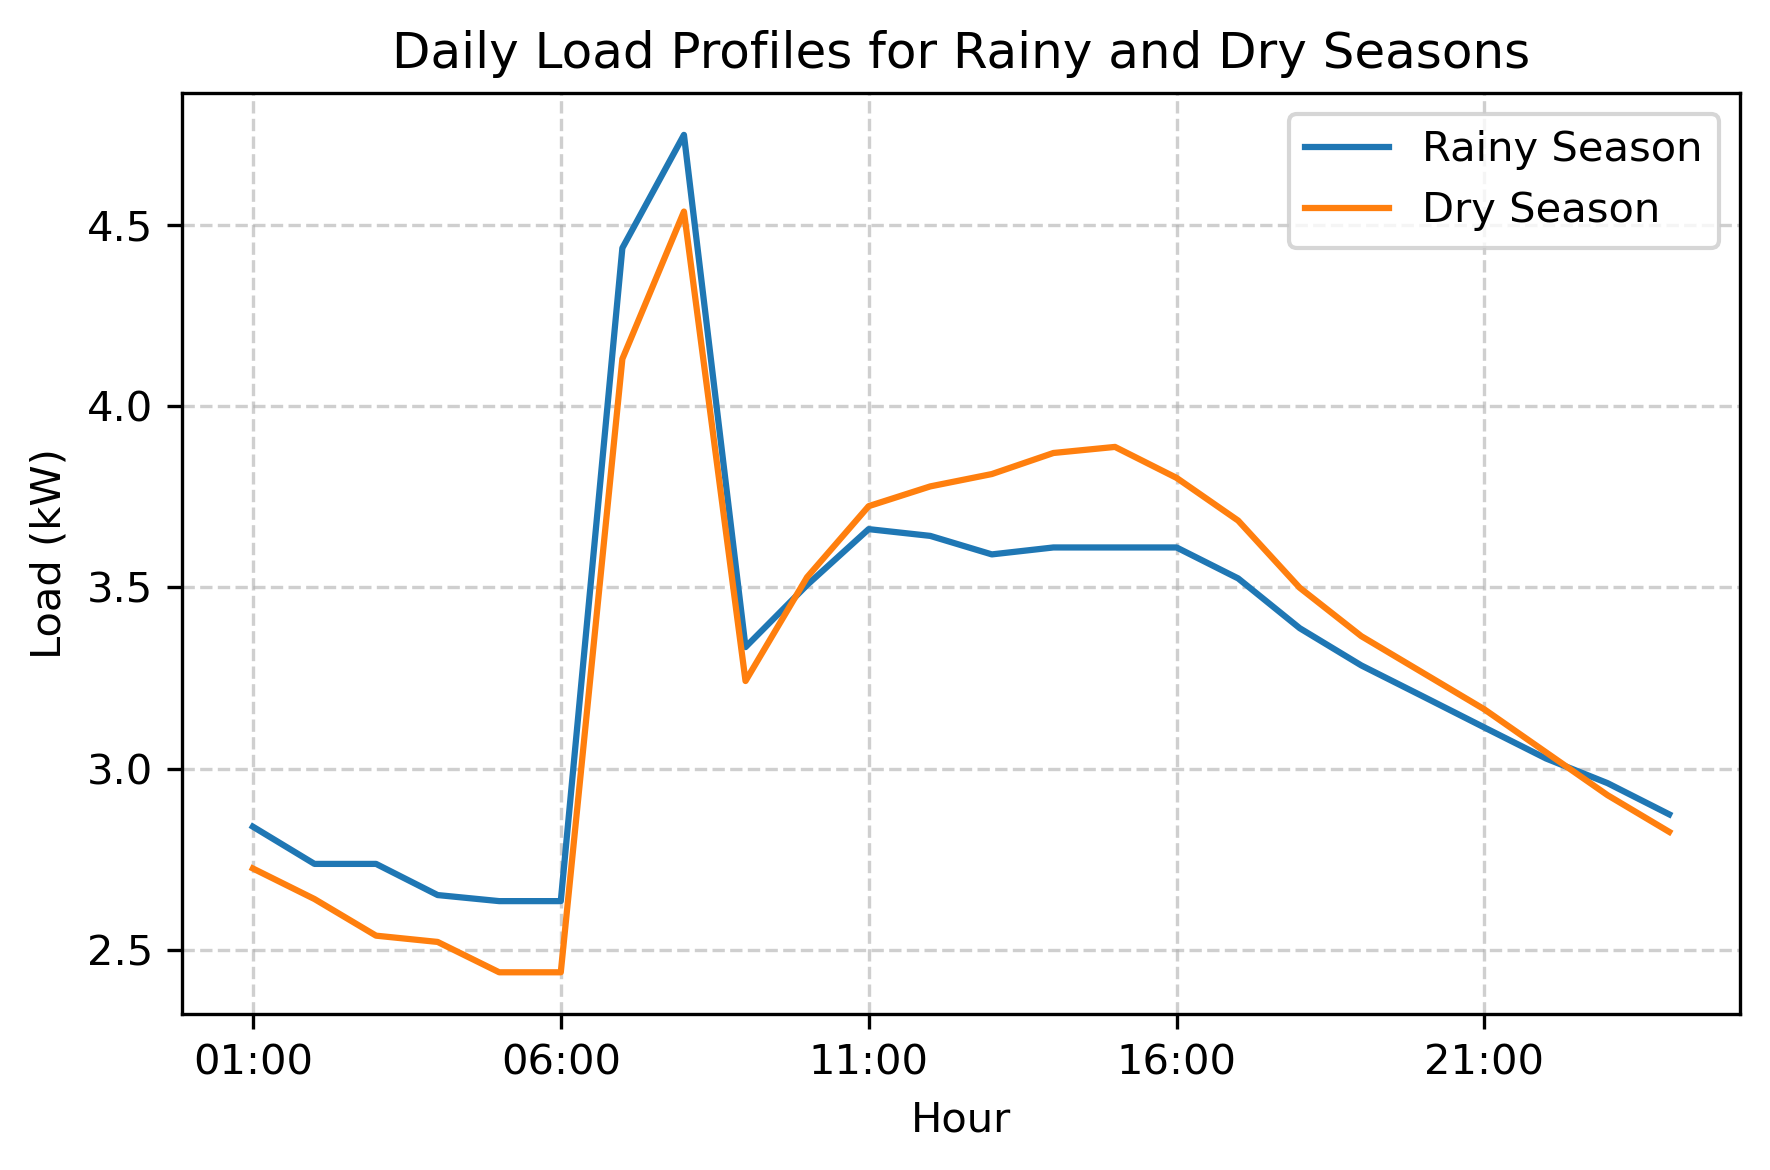

Monthly Energy Consumption (kWh):
January: 71.61 kWh
February : 73.31 kWh
March: 90.58 kWh
April: 89.14 kWh
May: 89.79 kWh
June: 79.18 kWh
July: 77.18 kWh
August: 74.35 kWh
September: 73.07 kWh
October: 82.62 kWh
November: 76.97 kWh
December: 74.78 kWh

Total Yearly Energy Consumption: 952.58 kWh


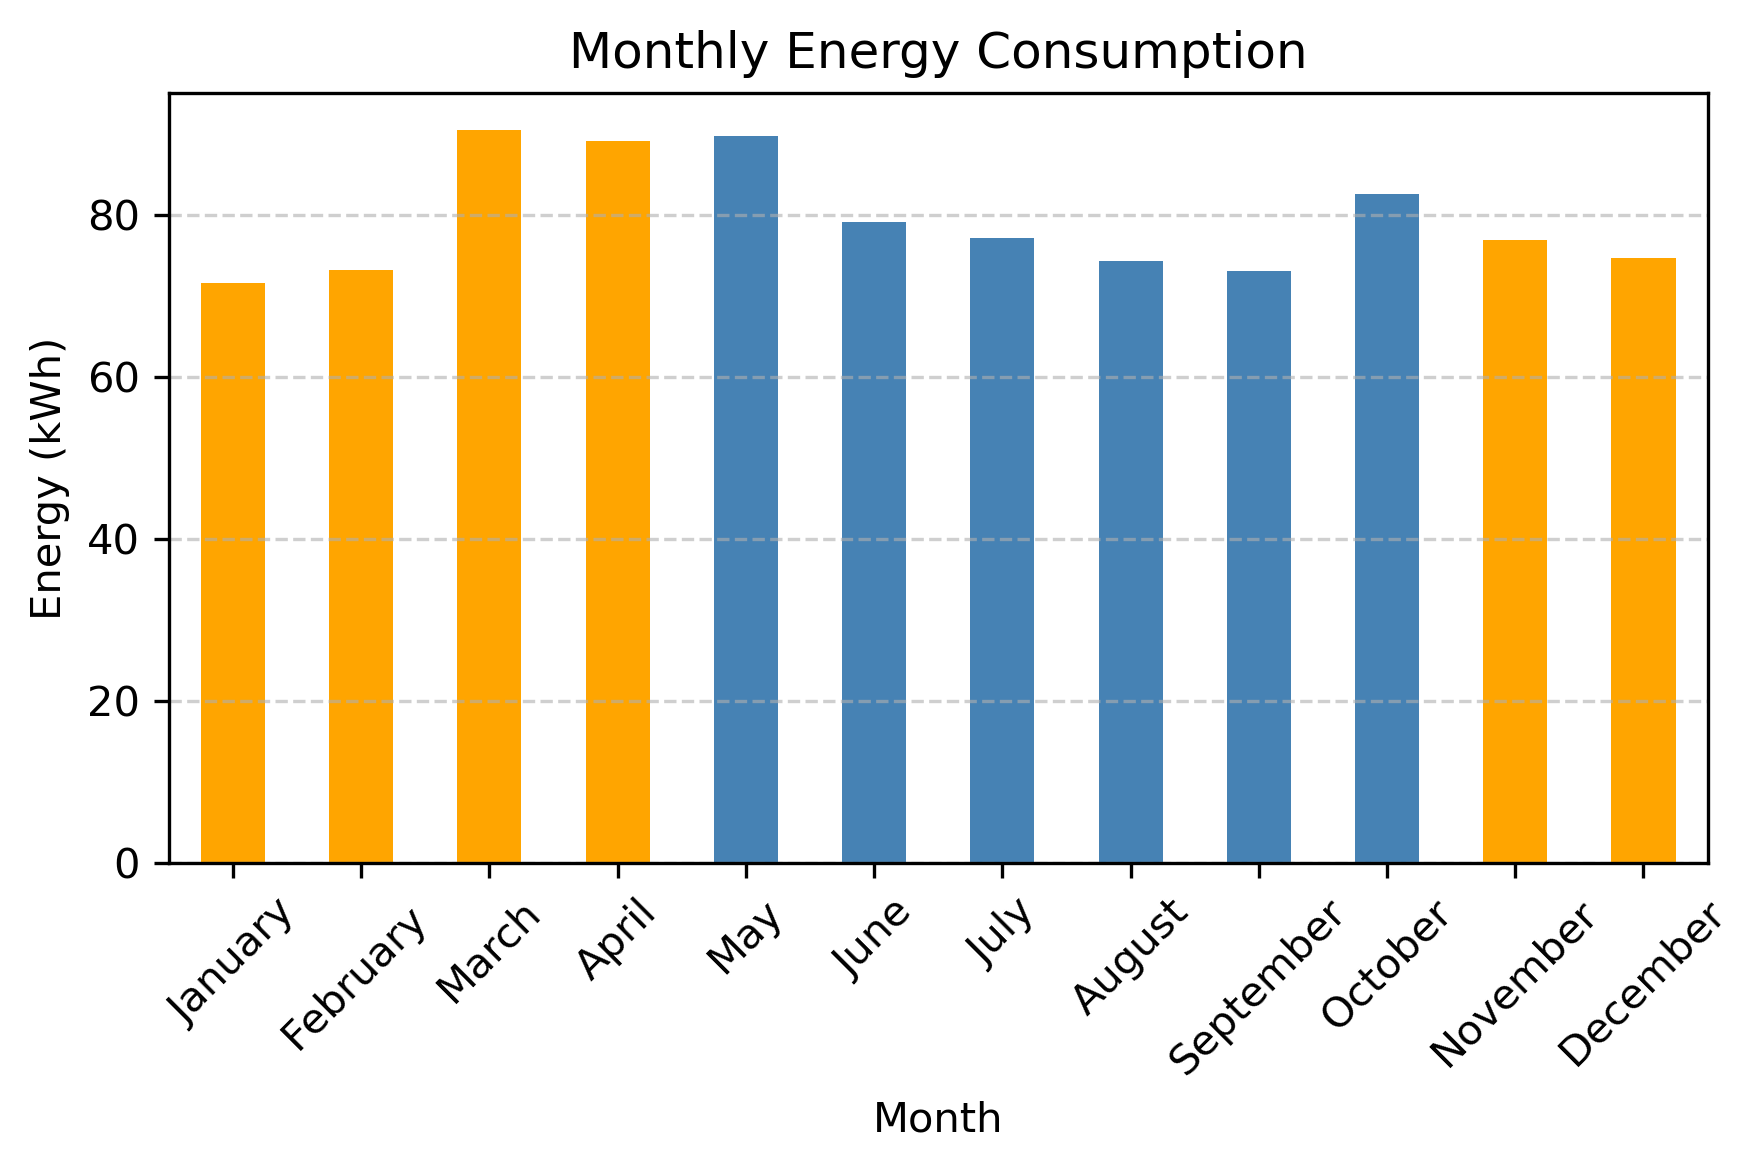

In [27]:
# Run the functions with the CSV file path
csv_file_path = "Data_files/Full_year_average.csv"
#load_profile_plot(csv_file_path)
specific_load_profiles(csv_file_path)
calculate_energy_consumption(csv_file_path)